In [33]:
%matplotlib inline

import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt

import sys
sys.path.append('../../../Code/')
from utils import read_dataset_log

In [27]:
from matplotlib import rcParams, font_manager
import matplotlib


rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

In [28]:
figdir = '../../Figures/Components/'

In [15]:
! ls /data/srlab1/dk718/stimseq/data/raw/pilot2_2023/cellranger/*/outs/possorted_genome_bam.bam

/data/srlab1/dk718/stimseq/data/raw/pilot2_2023/cellranger/BRI-2248_hashing/outs/possorted_genome_bam.bam
/data/srlab1/dk718/stimseq/data/raw/pilot2_2023/cellranger/BRI-2251_hashing/outs/possorted_genome_bam.bam


In [2]:
outfn = '../../../Data/PerDataset/Stimseq/count_intergenic_BRI-2248_hashing.tsv'

In [3]:
dat = pd.read_csv(outfn, sep='\t', header=None, nrows=150e6)
dat.head()

,0,1,2
0,CB:Z:CCATTCGTCCGAATGT-1,RE:A:I,UB:Z:CGTGTTCCAC
1,CB:Z:CAGCTGGCACCAGGTC-1,RE:A:I,UB:Z:GCCCCGCGGG
2,CB:Z:AGCTTGATCATCTGTT-1,RE:A:I,UB:Z:GCATAGTTGG
3,CB:Z:AATCGGTCAGGACCCT-1,RE:A:I,UB:Z:CGTGAAGCCA
4,CB:Z:TTGCGTCTCCGCAGTG-1,RE:A:I,UB:Z:AGCCCGGGCT


In [4]:
dat.shape

(150000000, 3)

In [5]:
dat = dat.drop_duplicates([0,2])

In [6]:
dat.shape

(60039940, 3)

In [7]:
umi_per_cell = dat.pivot_table(index=0, columns=1, aggfunc='count').replace(np.nan, 0)
umi_per_cell.index = ['3_' + x[5:-2] for x in umi_per_cell.index]

In [8]:
umi_per_cell = umi_per_cell[2]

In [24]:
umi_per_cell.columns = ['Exonic', 'Intronic', 'Intergenic']
umi_per_cell.head()

,Exonic,Intronic,Intergenic
3_AAACCTGAGAAACCGC,3.0,0.0,1.0
3_AAACCTGAGAACAACT,1.0,0.0,0.0
3_AAACCTGAGAACAATC,2921.0,86.0,290.0
3_AAACCTGAGAACTGTA,21.0,0.0,8.0
3_AAACCTGAGAAGGCCT,0.0,1.0,0.0


In [25]:
umi_per_cell.shape

(447362, 3)

In [37]:
dataset_paths = read_dataset_log('Dataset Paths')
dataset_paths.index = dataset_paths['dataset']
dataset_paths

,dataset,usage_fn,gene_scores_fn,gene_tpm_fn,tcat_fn,tcat_fn_withsingletons,manual_gating_fn,metadata_fn,Processing notebook path,cNMF notebook path,...,cnmf_dir,k,dt,processed_forcnmf_fn,tpm_counts_for_cnmf_fn,raw_counts_filt_fn,raw_counts_fn,dataset_type,tissue_type,context_label
dataset,,,,,,,,,,,,,,,,,,,,,
AMP-RA,AMP-RA,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMPRA....,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMPRA....,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMPRA....,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,NaN,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,NaN,NaN,...,/data/srlab1/TCAT/Data/PerDataset/AMPRA,34.0,0_15,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,discovery,Synovium,RA+OA
Pan-Cancer,Pan-Cancer,/data/srlab1/TCAT/Data/PerDataset/Pancancer/Pa...,/data/srlab1/TCAT/Data/PerDataset/Pancancer/Pa...,/data/srlab1/TCAT/Data/PerDataset/Pancancer/Pa...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,NaN,/data/srlab1/TCAT/Data/PerDataset/Pancancer/pa...,NaN,NaN,...,/data/srlab1/TCAT/Data/PerDataset/Pancancer,38.0,0.15,/data/srlab1/TCAT/Data/PerDataset/Pancancer/pa...,NaN,/data/srlab1/TCAT/Data/PerDataset/Pancancer/pa...,/data/srlab1/TCAT/Data/PerDataset/Pancancer/pa...,discovery,Pan-Tissue,Cancer+Healthy
TBRU,TBRU,/data/srlab1/TCAT/Data/PerDataset/TBRU/TBRU.20...,/data/srlab1/TCAT/Data/PerDataset/TBRU/TBRU.20...,/data/srlab1/TCAT/Data/PerDataset/TBRU/TBRU.20...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,NaN,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,NaN,NaN,...,/data/srlab1/TCAT/Data/PerDataset/TBRU,36.0,0_20,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,discovery,Blood,Healthy
HIV-Vaccine,HIV-Vaccine,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/HIVV...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/HIVV...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/HIVV...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/Manu...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,/data/srlab1/TCAT/Analysis/PerDataset/HaoEtAl/...,/data/srlab1/TCAT/Analysis/PerDataset/HaoEtAl/...,...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl,31.0,0_15,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,discovery,Blood,Post-Vaccine+Healthy
UK-Covid,UK-Covid,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/UKCO...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/UKCO...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/UKCO...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,NaN,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/hani...,NaN,NaN,...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID,44.0,0_20,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/hani...,NaN,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/hani...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/hani...,discovery,Blood,Covid-19+Healthy
COMBAT,COMBAT,/data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...,/data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...,/data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/PerDataset/COMBAT/Manua...,/data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...,NaN,NaN,...,/data/srlab1/TCAT/Data/PerDataset/COMBAT,35.0,0_15,/data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...,/data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...,/data/srlab1/TCAT/Data/PerDataset/C

In [38]:
adata = sc.read(dataset_paths.loc['Stimseq', 'raw_counts_fn'])

Only considering the two last: ['.doubletfilt', '.h5ad'].
Only considering the two last: ['.doubletfilt', '.h5ad'].


In [39]:
adata

AnnData object with n_obs × n_vars = 43222 × 36738
    obs: 'barcode', 'BRI', 'Run', 'Well', 'Batch', 'Biobank_ID', 'Sort_Status', 'HTO_Status', 'Demuxlet_Assignment', 'Total_RNA_Count', 'Total_ADT_Count', 'Total_HTO_Count', 'frac_ADT', 'A_cdr3', 'B_cdr3', 'DEMUX_RD.UNIQ', 'DEMUX_N.SNP', 'DEMUX_BEST', 'DEMUX_SNG.1ST', 'DEMUX_SNG.LLK1', 'DEMUX_DBL.1ST', 'DEMUX_DBL.2ND', 'DEMUX_LLK12', 'DEMUX_PRB.DBL', 'DEMUX_PRB.SNG1', 'batch_name', 'B_is_cell', 'B_high_confidence', 'B_full_length', 'B_productive', 'B_length', 'B_v_gene', 'B_d_gene', 'B_j_gene', 'B_c_gene', 'B_cdr1', 'B_cdr2', 'B_cdr3_nt', 'B_reads', 'B_umis', 'B_raw_clonotype_id', 'B_raw_consensus_id', 'B_Num_Hits_In_Barcode', 'B_Next_Highest_ReadCount', 'B_Num_Productive_In_Barcode', 'B_Has_Unproductive', 'A_is_cell', 'A_high_confidence', 'A_full_length', 'A_productive', 'A_length', 'A_v_gene', 'A_d_gene', 'A_j_gene', 'A_c_gene', 'A_cdr1', 'A_cdr2', 'A_cdr3_nt', 'A_reads', 'A_umis', 'A_raw_clonotype_id', 'A_raw_consensus_id', 'A_Num_H

In [40]:
adata.obs.head()

,barcode,BRI,Run,Well,Batch,Biobank_ID,Sort_Status,HTO_Status,Demuxlet_Assignment,Total_RNA_Count,...,A_Num_Hits_In_Barcode,A_Next_Highest_ReadCount,A_Num_Productive_In_Barcode,A_Has_Unproductive,B_Possible_TCR_Doublet,A_Possible_TCR_Doublet,DEMUX_BEST_Category,Hashtag1,Hashtag2,Hashtag3
3_AAACCTGAGACCGGAT,AAACCTGAGACCGGAT-1,2248_hashing,2,1,3,10042029,+,Hashtag3 (+),SNG,1443,...,NaN,NaN,NaN,nan,nan,nan,SNG,8,19,4305
3_AAACCTGAGAGGGCTT,AAACCTGAGAGGGCTT-1,2248_hashing,2,1,3,10057029,U,Hashtag1 (U),SNG,3508,...,2.0,67.0,1.0,True,Productive Singleton,Productive Singleton,SNG,391,61,138
3_AAACCTGAGAGTCTGG,AAACCTGAGAGTCTGG-1,2248_hashing,2,1,3,10049452,+,Hashtag3 (+),SNG,18799,...,1.0,NaN,1.0,False,Productive Singleton,Productive Singleton,SNG,9,55,5301
3_AAACCTGAGCTAGCCC,AAACCTGAGCTAGCCC-1,2248_hashing,2,1,3,10042029,U,Hashtag1 (U),SNG,4133,...,1.0,NaN,0.0,True,Productive Singleton,Unproductive Singleton,SNG,1477,50,153
3_AAACCTGAGCTGCCCA,AAACCTGAGCTGCCCA-1,2248_hashing,2,1,3,10057029,+,Hashtag3 (+),SNG,10485,...,1.0,NaN,1.0,False,Productive Singleton,Productive Singleton,SNG,17,39,8338


In [41]:
len(set(adata.obs.index[adata.obs['BRI']=='2248_hashing'])), len(set(adata.obs.index[adata.obs['BRI']=='2248_hashing']).intersection(umi_per_cell.index))

(17339, 17339)

In [42]:
run_cells = adata.obs.index[adata.obs['BRI']=='2248_hashing']

In [43]:
adata = adata[run_cells, :]
adata

View of AnnData object with n_obs × n_vars = 17339 × 36738
    obs: 'barcode', 'BRI', 'Run', 'Well', 'Batch', 'Biobank_ID', 'Sort_Status', 'HTO_Status', 'Demuxlet_Assignment', 'Total_RNA_Count', 'Total_ADT_Count', 'Total_HTO_Count', 'frac_ADT', 'A_cdr3', 'B_cdr3', 'DEMUX_RD.UNIQ', 'DEMUX_N.SNP', 'DEMUX_BEST', 'DEMUX_SNG.1ST', 'DEMUX_SNG.LLK1', 'DEMUX_DBL.1ST', 'DEMUX_DBL.2ND', 'DEMUX_LLK12', 'DEMUX_PRB.DBL', 'DEMUX_PRB.SNG1', 'batch_name', 'B_is_cell', 'B_high_confidence', 'B_full_length', 'B_productive', 'B_length', 'B_v_gene', 'B_d_gene', 'B_j_gene', 'B_c_gene', 'B_cdr1', 'B_cdr2', 'B_cdr3_nt', 'B_reads', 'B_umis', 'B_raw_clonotype_id', 'B_raw_consensus_id', 'B_Num_Hits_In_Barcode', 'B_Next_Highest_ReadCount', 'B_Num_Productive_In_Barcode', 'B_Has_Unproductive', 'A_is_cell', 'A_high_confidence', 'A_full_length', 'A_productive', 'A_length', 'A_v_gene', 'A_d_gene', 'A_j_gene', 'A_c_gene', 'A_cdr1', 'A_cdr2', 'A_cdr3_nt', 'A_reads', 'A_umis', 'A_raw_clonotype_id', 'A_raw_consensus_id', 

In [44]:
umi_per_cell_filt = umi_per_cell.loc[run_cells, :]

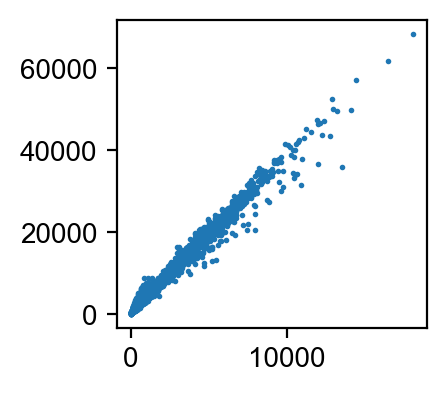

In [45]:
(fig,ax) = plt.subplots(1,1, figsize=(2,2), dpi=200)
ax.scatter(umi_per_cell_filt[['Exonic', 'Intronic']].sum(axis=1), adata.obs['Total_RNA_Count'], s=1)

In [46]:
umi_per_cell_filt[['Exonic', 'Intronic']].sum(axis=1)

3_AAACCTGAGACCGGAT     225.0
3_AAACCTGAGAGGGCTT     874.0
3_AAACCTGAGAGTCTGG    4697.0
3_AAACCTGAGCTAGCCC     973.0
3_AAACCTGAGCTGCCCA    2564.0
                       ...  
3_TTTGTCATCCCATTAT    2341.0
3_TTTGTCATCCGTCAAA     378.0
3_TTTGTCATCGGTGTCG     814.0
3_TTTGTCATCTGGTTCC    2176.0
3_TTTGTCATCTGTCTAT    2430.0
Length: 17339, dtype: float64

Text(0.5, 0, 'Proportion intergenic reads')

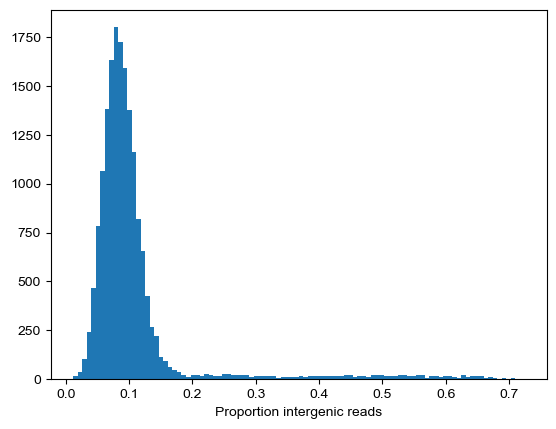

In [47]:
intergenic_proportion = umi_per_cell_filt['Intergenic'] / (umi_per_cell_filt['Intergenic'] + umi_per_cell_filt['Exonic'])
_ = plt.hist(intergenic_proportion, bins=100)
plt.xlabel('Proportion intergenic reads')

In [48]:
! ls ../../../Data/PerDataset/Stimseq

ActivationLogisticRegression.sav
ADT_TP10KCLR_ForMAGIC.h5ad
count_intergenic_BRI-2248_hashing.tsv
ManualGating.Magic.20230831.tsv
ManualGating.Magic.FinalLabel.20230831.tsv
ManualGating.MagicMarker.RNA_LogTP10KADT.ADT_CLRTP10K.tsv
ManualGating.UnsmoothedMarker.RNA_LogTP10KADT.ADT_CLRTP10K.tsv
raw.mincellfilt.htonegfilt.doubletfilt.h5ad
RNA_logTP1K_ForMAGIC.h5ad
Sorts
Stimseq_learnHarmonyRNA_RefitBoth
stimseq.pilot2.ADT.TP10K.VarNorm.leidenRNA_MI.tsv
stimseq.pilot2.ADT.VarNorm.HarmonyGeneCorrect.h5ad
stimseq.pilot2.ADT.VarNorm.HVG.HarmonyGeneCorrect.h5ad
stimseq.pilot2.metadata.tsv
stimseq.pilot2.metadata.withgating.tsv
stimseq.pilot2.RNA_and_ADT.TP10K.h5ad
stimseq.pilot2.RNA_and_ADT.TP10K.VarNorm.HVG.HarmonyGeneCorrect.WNN.UMAP.tsv
stimseq.pilot2.RNA_and_ADT.VarNorm.HVG.HarmonyGeneCorrect.h5ad
stimseq.pilot2.RNA_and_ADT.VarNorm.HVG.HarmonyGeneCorrect.h5mu
stimseq.pilot2.RNA.HVGlist.tsv
stimseq.pilot2.RNA.VarNorm.HVG.HarmonyGeneCorrect.h5ad
TCAT.20231005.tsv
TCAT.20231201.tsv


In [58]:
cgepnames = read_dataset_log('cGEP_Name')
renmap = dict(zip(cgepnames['cGep_Name'], cgepnames['Short_Name']))

In [59]:
tcat_usage = pd.read_csv(dataset_paths.loc['Stimseq', 'tcat_fn'], sep='\t', index_col=0)
tcat_usage = tcat_usage.rename(columns=renmap)
tcat_usage_norm = tcat_usage.div(tcat_usage.sum(axis=1), axis=0)


In [60]:
overlap = list(set(tcat_usage_norm.index).intersection(intergenic_proportion.index))

In [61]:
tcat_usage_norm = tcat_usage_norm.loc[overlap, :]
intergenic_proportion = intergenic_proportion.loc[overlap]

In [62]:
R = tcat_usage_norm.loc[intergenic_proportion.index, :].corrwith(intergenic_proportion).sort_values(ascending=False)
R.head()

MALAT1           0.801214
Mito             0.380370
Treg             0.133979
BCL2-Survival    0.115576
Tfh-2            0.091651
dtype: float64

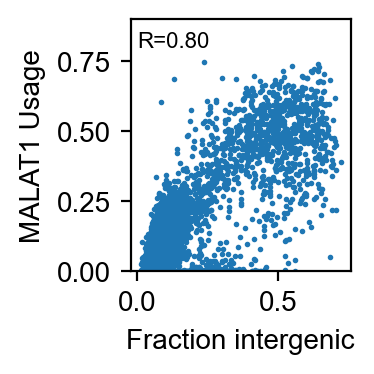

In [72]:
(fig,ax) = plt.subplots(1,1, figsize=(2,2), dpi=200, gridspec_kw={'left':0.35, 'bottom':0.25})
ax.scatter(intergenic_proportion, tcat_usage_norm.loc[intergenic_proportion.index, 'MALAT1'], s=1)
ax.set_xlabel('Fraction intergenic', fontsize=10)
ax.set_ylabel('MALAT1 Usage', fontsize=10)
ax.set_ylim([0,.9])
ax.text(0, .8, 'R=%.2f' % R.at['MALAT1'], fontsize=8)
plt.savefig('../../../Figures/Components/MALAT1_IntergenicFraction.png')
plt.savefig('../../../Figures/Components/MALAT1_IntergenicFraction.pdf')

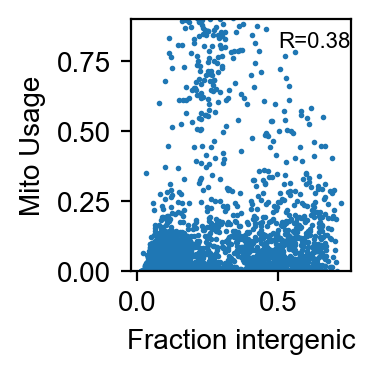

In [74]:
(fig,ax) = plt.subplots(1,1, figsize=(2,2), dpi=200, gridspec_kw={'left':0.35, 'bottom':0.25})
ax.scatter(intergenic_proportion, tcat_usage_norm.loc[intergenic_proportion.index, 'Mito'], s=1)
ax.set_xlabel('Fraction intergenic', fontsize=10)
ax.set_ylabel('Mito Usage', fontsize=10)
ax.set_ylim([0,.9])
ax.text(.5, .8, 'R=%.2f' % R.at['Mito'], fontsize=8)
plt.savefig('../../../Figures/Components/Mito_IntergenicFraction.png')
plt.savefig('../../../Figures/Components/Mito_IntergenicFraction.pdf')

In [66]:
from scipy.stats import pearsonr

In [67]:
pearsonr(intergenic_proportion, tcat_usage_norm.loc[intergenic_proportion.index, 'MALAT1'])

PearsonRResult(statistic=0.8012141805366858, pvalue=0.0)

In [68]:
pearsonr(intergenic_proportion, tcat_usage_norm.loc[intergenic_proportion.index, 'Mito'])

PearsonRResult(statistic=0.38036950292393784, pvalue=0.0)

In [28]:
cd4_naive = tcat_usage_norm.index[tcat_usage_norm['CD4_Naive_Ribo/T_Naive_T_Naive_Translation_Translation/T_Naive']>.25]
len(cd4_naive)

347

In [29]:
R4naive = tcat_usage_norm.loc[cd4_naive, :].corrwith(intergenic_proportion.loc[cd4_naive]).sort_values(ascending=False)
R4naive.head()

PoorQuality_PoorQuality1    0.800481
Mito                        0.329808
Tfh                         0.294887
Doublet_Plasmablast         0.291153
Pan-Cancer:Tex_Single       0.246178
dtype: float64

In [30]:
from scipy.stats import pearsonr

In [36]:
r,p = pearsonr(tcat_usage_norm.loc[intergenic_proportion.index, 'PoorQuality_PoorQuality1'], intergenic_proportion)

In [39]:
r

0.9256224011125407

In [40]:
p

0.0